## Task 5

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('Advertising.csv')

### Exploratory Data Analysis

In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot: >

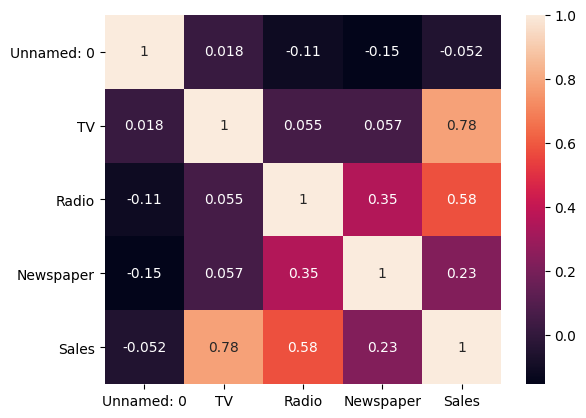

In [7]:
sns.heatmap(df.corr(),annot=True)

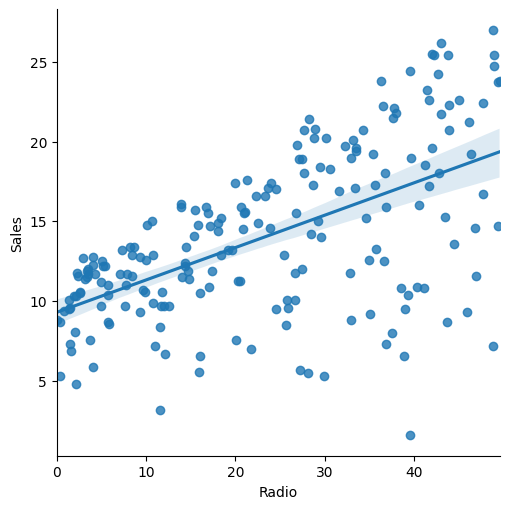

In [8]:
sns.lmplot(data=df,x='Radio',y="Sales")

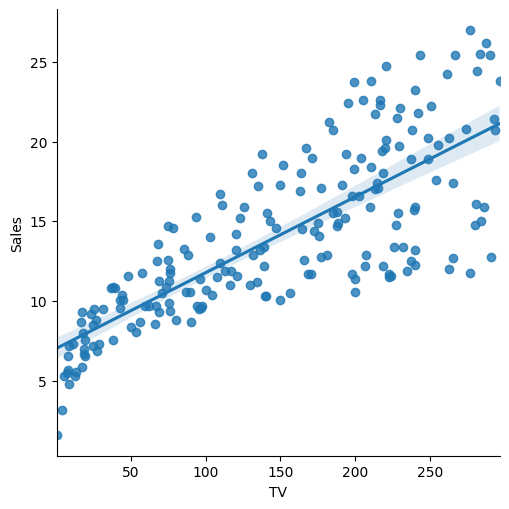

In [9]:
sns.lmplot(data=df,x='TV',y="Sales")

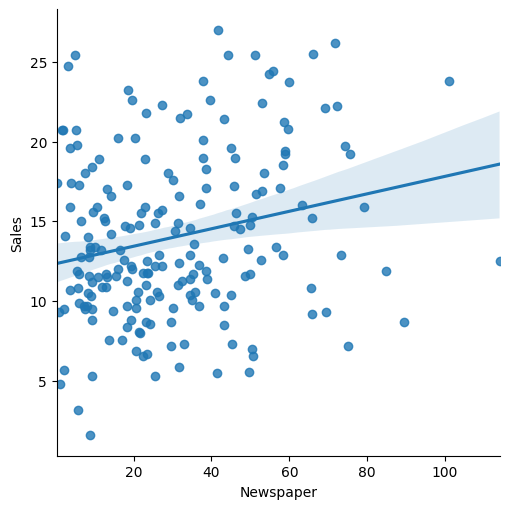

In [10]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

### Defining model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [13]:
model=LinearRegression()

model.fit(x_train,y_train)

y_predict=model.predict(x_test)

In [14]:
print(model.intercept_)
print(model.coef_)

2.848845981475902
[0.04441066 0.19656498 0.00357552]


In [15]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,11.3,10.017078
1,8.4,7.415322
2,8.7,7.005491
3,25.4,24.212379
4,11.7,12.066605
5,8.7,6.571338
6,7.2,13.115410
7,13.2,14.977876
8,9.2,11.040877
9,16.6,16.255128


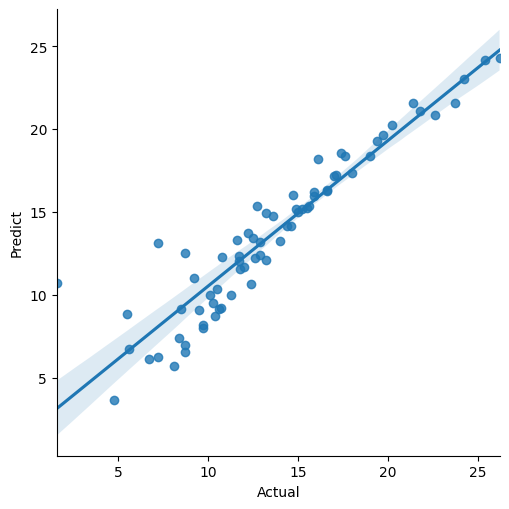

In [16]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")

### Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.1772969293020834
Mean_squared_error: 3.2848476202765773
Squre_Mean_absolute_error: 1.085033146637504
r2_score: 0.8715709300673591
